#### University World Rankings Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uni = pd.read_csv('World University Rankings 2023.csv', dtype_backend='pyarrow', index_col='University Rank')

In [3]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2341 entries, 1 to -
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Name of University           2233 non-null   string[pyarrow]
 1   Location                     2047 non-null   string[pyarrow]
 2   No of student                2209 non-null   string[pyarrow]
 3   No of student per staff      2208 non-null   double[pyarrow]
 4   International Student        2209 non-null   string[pyarrow]
 5   Female:Male Ratio            2128 non-null   string[pyarrow]
 6   OverAll Score                1799 non-null   string[pyarrow]
 7   Teaching Score               1799 non-null   double[pyarrow]
 8   Research Score               1799 non-null   double[pyarrow]
 9   Citations Score              1799 non-null   double[pyarrow]
 10  Industry Income Score        1799 non-null   double[pyarrow]
 11  International Outlook Score  1799 non-

In [4]:
uni.head()

,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
University Rank,,,,,,,,,,,,
1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


##### _Indian University Rankings_

In [5]:
uni.loc[uni.Location == 'India'].head()

,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
University Rank,,,,,,,,,,,,
251–300,Indian Institute of Science,India,"3,990",8.8,1%,27 : 73,48.9–51.1,60.5,56.9,33.1,80.1,28.0
351–400,JSS Academy of Higher Education and Research,India,"7,891",9.5,7%,54 : 46,45.0–46.9,34.4,9.4,99.3,38.4,35.2
351–400,Shoolini University of Biotechnology and Manag...,India,"2,973",14.3,2%,45 : 55,45.0–46.9,23.2,14.4,98.3,37.9,49.1
401–500,Alagappa University,India,"4,831",15.7,0%,63 : 37,42.1–44.9,34.6,11.0,82.8,37.2,35.1
401–500,Mahatma Gandhi University,India,"1,855",14.6,2%,61 : 39,42.1–44.9,42.5,31.5,58.1,37.9,21.9


#### Country with maximum students

In [6]:
uni['No of student'] = uni['No of student'].str.replace(',','')
uni['No of student'] = pd.to_numeric(uni['No of student'])

In [7]:
uni.groupby('Location')['No of student'].sum().sort_values(ascending=False).head()

Location
United States    3895900
China            2674751
Egypt            2617820
Turkey           1869317
Brazil           1769257
Name: No of student, dtype: int64[pyarrow]

#### Country with maximum % of internation students

In [8]:
uni['International Student'] = uni['International Student'].str.replace('%','')
uni['International Student'] = pd.to_numeric(uni['International Student'])

In [9]:
uni.groupby('Location')['International Student'].sum().sort_values(ascending=False).head()

Location
United Kingdom    4474.0
United States     2269.0
France             981.0
Japan              766.0
Australia          751.0
Name: International Student, dtype: double[pyarrow]

##### Which university has the least No os student per teacher per country

In [10]:
uni.groupby('Location')['No of student per staff'].min().sort_values(ascending=False).head()

Location
Kuwait     103.9
Fiji        36.6
Somalia     35.3
Kenya       34.5
Morocco     33.3
Name: No of student per staff, dtype: double[pyarrow]

#### PLOT: Bar Plot Country Number of Student

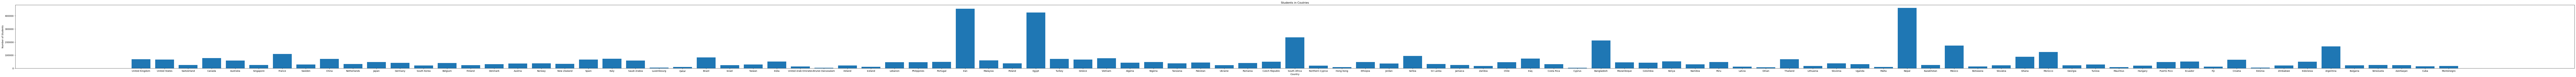

In [11]:
uni = uni.dropna()

plt.figure(figsize = (200, 5))
plt.bar(uni['Location'], uni['No of student'])
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.title('Students in Coutries')
plt.show()

#### Which countries has the maximum universities in the world rankings?

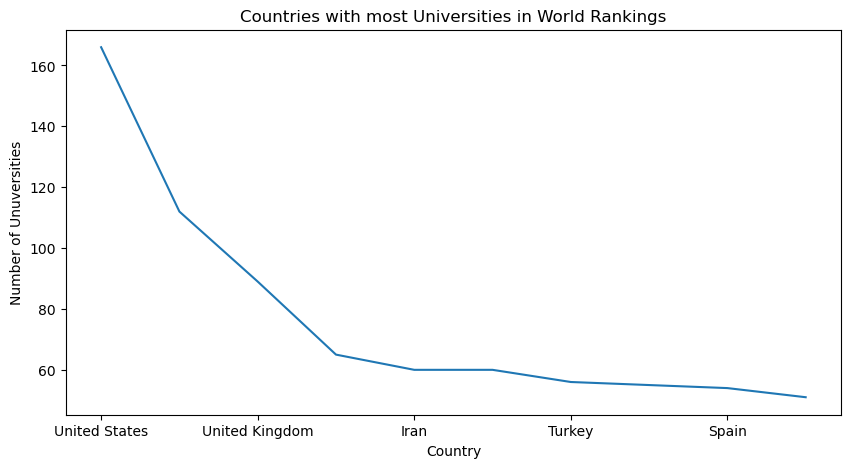

In [21]:
plt.figure(figsize = (10, 5))
ax = uni.groupby("Location")["Name of University"].count().sort_values(ascending=False).head(10).plot()
plt.xlabel('Country')
plt.ylabel('Number of Unuversities')
plt.title('Countries with most Universities in World Rankings')
plt.show()